In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
data = pd.read_csv("data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
data1 = data.drop('country', axis=1)
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.mean())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_proc = (data_num - mean) / std
countries = data.iloc[:,0]
countries.head()
print(data_proc.dtypes)

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object


In [9]:

class KmeansClustering:
    def __init__(self, k, n_iters=50):
        self.k = k
        self.n_iters = n_iters
        self.centroids = None
        self.centroids_progression = []
        self.labels_progression = []
    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, n_features))

        for _ in range(self.n_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            y = np.argmin(distances, axis=1)
            self.labels_progression.append(y)
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[y == i]
                if len(cluster_points) == 0:
                    new_centroids.append(X[np.random.choice(n_samples)])  
                else:
                    new_centroids.append(cluster_points.mean(axis=0))
            self.centroids = np.array(new_centroids)
            self.centroids_progression.append(self.centroids.copy())
        return y

    def inertia(self, X, y):
        X = np.array(X)
        inertia = 0
        for i in range(self.k):
            cluster_points = X[y == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia


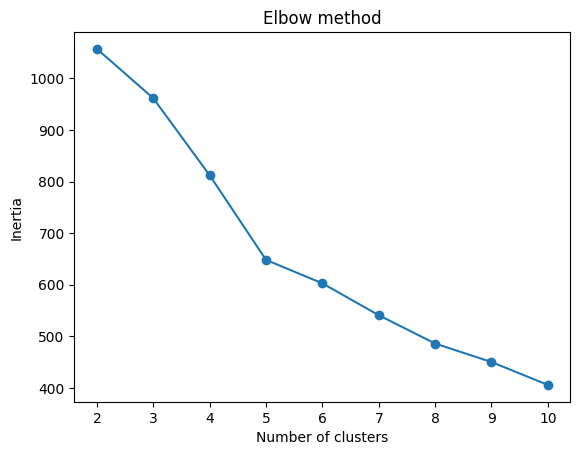

167


In [10]:
inertias = []
for i in range(2,11):
    clusterer = KmeansClustering(k=i)
    labels = clusterer.fit(data_proc)
    inertias.append(clusterer.inertia(data_proc,labels))
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(data_proc.shape[0])

In [11]:
def pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    X_pca = X_centered.dot(eigvecs[:, :n_components])
    return X_pca
X_pca = pca(data_proc, n_components=3)
clusterer = KmeansClustering(k=5)
labels = clusterer.fit(data_proc)
X_pca = np.array(X_pca)  


In [ ]:
"""
folder_path = "C:\ImportantOutputs\KmeansClusterAnim"
def plot_centroids_and_data(iteration, X_pca, clusterer, ax, centroid_scatter, data_scatter):
    if data_scatter is not None:
        data_scatter.remove() 
    if centroid_scatter is not None:
        centroid_scatter.remove() 
    labels_step = clusterer.labels_progression[iteration]
    data_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_step, cmap='viridis', marker='o')
    centroids_step = clusterer.centroids_progression[iteration]
    centroid_scatter = ax.scatter(centroids_step[:, 0], centroids_step[:, 1], centroids_step[:, 2], color='red', marker='x', s=100)
    ax.set_title(f'K-Means Clustering with PCA (Iteration {iteration + 1})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.savefig(f"{folder_path}/frame_{i}.png")
    plt.draw()
    plt.pause(0.2)

    return centroid_scatter, data_scatter
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
centroid_scatter = None
data_scatter = None
for i in range(0, len(clusterer.centroids_progression), 1):
    centroid_scatter, data_scatter = plot_centroids_and_data(i, X_pca, clusterer, ax, centroid_scatter, data_scatter)
plt.show()
"""

In [12]:
for i in range(5): 
    cluster_countries = [countries[j] for j in range(len(countries)) if labels[j] == i]
    print(f"Cluster {i+1}: {', '.join(cluster_countries)}")

Cluster 1: Brunei, Ireland, Kuwait, Luxembourg, Malta, Qatar, Singapore, United Arab Emirates
Cluster 2: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Equatorial Guinea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Rwanda, Senegal, Sierra Leone, South Africa, Tanzania, Togo, Uganda, Zambia
Cluster 3: Albania, Antigua and Barbuda, Armenia, Bahamas, Bahrain, Barbados, Belarus, Belize, Bhutan, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuador, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, Jamaica, Jordan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Montenegro, Moroc

In [13]:
def silhouette_score(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    
    n_samples = X.shape[0]
    
    silhouette_scores = []
    
    for i in range(n_samples):
        point = X[i]
        point_label = labels[i]
        
        same_cluster_points = X[labels == point_label]
        a_i = np.mean(np.linalg.norm(same_cluster_points - point, axis=1))
        
        other_labels = np.unique(labels[labels != point_label])
        b_i = np.inf 
        
        for other_label in other_labels:
            other_cluster_points = X[labels == other_label]
            b_i_cluster = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
            b_i = min(b_i, b_i_cluster)
        
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
    
    return np.mean(silhouette_scores)

In [14]:
class KNearestNeighbourClustering:
    def __init__(self,k=3):
        self.k = k
    def fit(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def distsortvote(self,x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_class = unique_labels[np.argmax(counts)]
        return predicted_class
    def predict(self,X_test):
        predictions = [self.distsortvote(x) for x in np.array(X_test)]
        return np.array(predictions)

In [29]:
knnclust = KNearestNeighbourClustering()
knnclust.fit(X_train,y_train)
predict = knnclust.predict(X_test)
acc = np.sum(predict==y_test)/len(y_test)
print(acc)

0.8


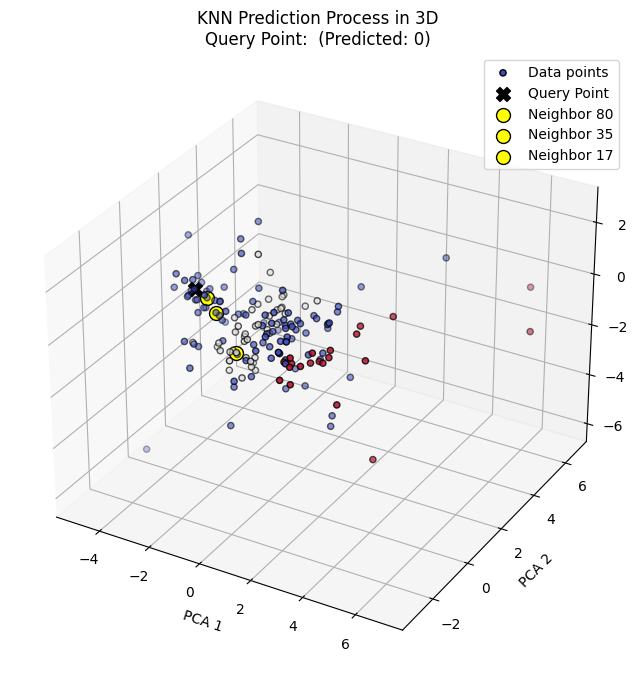

In [30]:
query_point_9D = df_classification.iloc[0, :-1].values  # The original 9D data (not PCA-reduced)

predicted_label = knnclust.predict([query_point_9D])  # Predict using the original 9D data

distances = np.linalg.norm(knnclust.X_train - query_point_9D, axis=1)  # Use 9D data here
k_indices = np.argsort(distances)[:knnclust.k]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_classification['development_status'], cmap='coolwarm', edgecolors='k', label='Data points')

query_point_pca = X_pca[0]  # Use the PCA-reduced version of the query point
ax.scatter(query_point_pca[0], query_point_pca[1], query_point_pca[2], c='black', marker='X', s=100, label='Query Point')

for i in k_indices:
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='yellow', marker='o', s=100, edgecolors='k', label=f"Neighbor {i}")

ax.set_title(f"KNN Prediction Process in 3D\nQuery Point:  (Predicted: {predicted_label[0]})")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()


In [20]:
class HierarchicalClustering:
    def __init__(self, linkage='single'):
        """
        Initialize the hierarchical clustering class.
        :param linkage: Type of linkage to use ('single', 'complete', 'average').
        """
        self.linkage = linkage

    def fit(self, X):
        """
        Fit the hierarchical clustering on the dataset.
        :param X: A numpy array or pandas dataframe of the data.
        """
        self.X = np.array(X)
        self.n_samples = self.X.shape[0]
        
        # Initialize each point as its own cluster
        self.clusters = {i: [i] for i in range(self.n_samples)}
        self.distance_matrix = self._compute_initial_distances()

        self.linkage_history = []

        while len(self.clusters) > 1:
            # Find the closest pair of clusters
            i, j = self._find_closest_clusters()
            # Merge clusters i and j
            self._merge_clusters(i, j)

        return self.linkage_history

    def _compute_initial_distances(self):
        """
        Compute the initial distance matrix.
        """
        n = self.n_samples
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                distances[i, j] = np.linalg.norm(self.X[i] - self.X[j])
                distances[j, i] = distances[i, j]
        return distances

    def _find_closest_clusters(self):
        """
        Find the closest pair of clusters.
        """
        min_distance = float('inf')
        closest_pair = None
        cluster_ids = list(self.clusters.keys())
        for i in range(len(cluster_ids)):
            for j in range(i + 1, len(cluster_ids)):
                c1, c2 = cluster_ids[i], cluster_ids[j]
                distance = self._compute_cluster_distance(c1, c2)
                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (c1, c2)
        return closest_pair

    def _compute_cluster_distance(self, c1, c2):
        """
        Compute distance between two clusters.
        """
        points_c1 = self.clusters[c1]
        points_c2 = self.clusters[c2]
        
        if self.linkage == 'single':
            return np.min([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        elif self.linkage == 'complete':
            return np.max([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        elif self.linkage == 'average':
            return np.mean([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        else:
            raise ValueError("Unsupported linkage type. Choose from 'single', 'complete', or 'average'.")

    def _merge_clusters(self, i, j):
        """
        Merge clusters i and j into a single cluster.
        """
        # Merge the clusters
        self.clusters[i] = self.clusters[i] + self.clusters[j]
        del self.clusters[j]
        self.linkage_history.append((i, j))


In [33]:
hclust = HierarchicalClustering(linkage='single')
linkage_history = hclust.fit(X_pca)


In [68]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(linkage_history, n_samples, labels=None, font_size=6):
    """
    Plot a dendrogram based on the linkage history with dynamically generated colors.
    :param linkage_history: The merge order from hierarchical clustering.
    :param n_samples: The number of original samples.
    :param labels: Optional list of labels for the samples.
    :param font_size: Font size for the labels.
    """
    # Prepare dendrogram matrix
    Z = []
    cluster_sizes = {i: 1 for i in range(n_samples)}
    for idx, (i, j) in enumerate(linkage_history):
        size_i = cluster_sizes[i]
        size_j = cluster_sizes[j]
        Z.append([i, j, idx + 1, size_i + size_j])  # [Cluster1, Cluster2, Distance, Sample Count]
        cluster_sizes[idx + n_samples] = size_i + size_j
    Z = np.array(Z)

    # Generate a gradient of colors based on the number of merges (linkage steps)
    num_merges = len(Z)
    color_gradient = np.linspace(0, 1, num_merges)  # Create a range of values between 0 and 1
    
    # Generate colors using a simple approach (from light to dark) without colormap imports
    colors = [plt.cm.tab20(c) for c in color_gradient]  # Using viridis without colormap import

    # Manually plot dendrogram
    plt.figure(figsize=(12, 8))
    current_x = {i: i for i in range(n_samples)}
    label_positions = {i: i for i in range(n_samples)}

    # Loop through linkage history and apply colors
    for idx, (c1, c2, height, _) in enumerate(Z):
        x1 = current_x[c1]
        x2 = current_x[c2]
        color = colors[idx]  # Use color from the gradient
        plt.plot([x1, x1, x2, x2], [0, height, height, 0], c=color)  # Use color for each branch
        current_x[idx + n_samples] = (x1 + x2) / 2
        label_positions[idx + n_samples] = (label_positions[c1] + label_positions[c2]) / 2

    # Add labels if provided
    if labels is not None:
        label_x_positions = [label_positions[i] for i in range(n_samples)]
        label_y_positions = [0] * n_samples  # Position labels at the bottom of the dendrogram

        plt.xticks(
            ticks=label_x_positions,
            labels=labels,  # Rotating the labels to avoid overlap
            ha='right',   # Align the labels to the right
            fontsize=font_size  # Adjust font size
        )
    else:
        plt.xticks(
            ticks=[label_positions[i] for i in range(n_samples)],
            labels=range(n_samples),
            fontsize=font_size  # Adjust font size
        )

    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample")
    plt.ylabel("Distance")
    
    # Adjust the layout to avoid label overlap
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for labels
    
    plt.show()

# Example usage:
# labels = ["Country1", "Country2", ...]  # List of country names as labels
# plot_dendrogram(linkage_history, len(X_pca), labels, font_size=8)


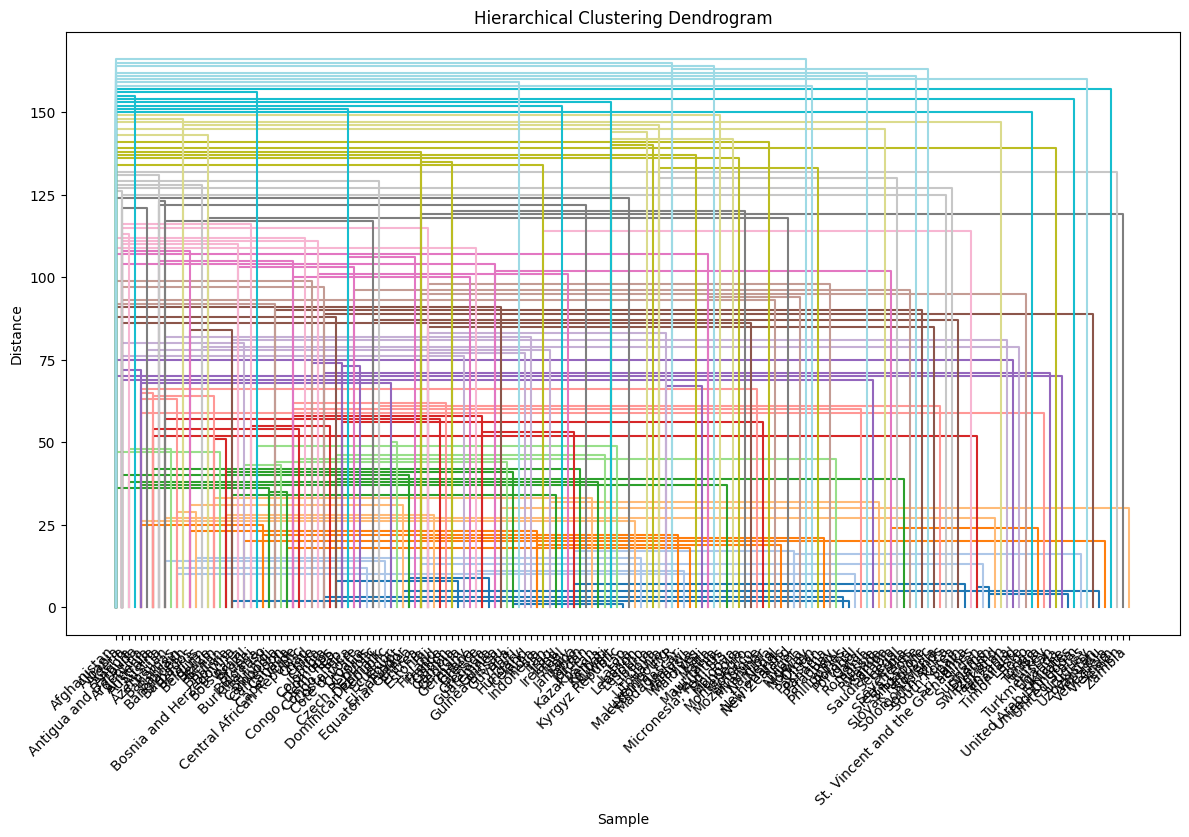

In [69]:
plot_dendrogram(linkage_history, len(X_pca), labels=countries)

In [31]:
def plot_3d_with_clusters(X_pca, linkage_history):
    """
    Plot 3D visualization with hierarchical clustering result.
    """
    # Get the final cluster assignments
    hierarchical = HierarchicalClustering(linkage='single')
    hierarchical.fit(X_pca)
    cluster_labels = np.zeros(X_pca.shape[0])
    
    for idx, (cluster1, cluster2) in enumerate(linkage_history):
        for point in hierarchical.clusters[cluster1]:
            cluster_labels[point] = idx
        for point in hierarchical.clusters[cluster2]:
            cluster_labels[point] = idx

    # Plot the 3D scatter plot with colors indicating clusters
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o')
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    
    plt.title("3D Visualization of PCA Data with Hierarchical Clustering")
    plt.colorbar(scatter, label='Cluster ID')
    plt.show()
plot_3d_with_clusters(X_pca, linkage_history)

KeyError: 65